# Krylov complexity for the standard map

The goal of this notebook is to calculate the Krylov complexity in the standard map. In this case, there is no Hamiltonian operator describing the unitary evolution, but rather just a unitary operator.
We will calculate the Krylov complexity by taking the logarithm of such unitary, and we will prove that the energy level statistics, the Krylov coefficients and complexity are correctly reproduced with this approach.

In [1]:
import numpy as np
from scipy import linalg,exp, cos, sin
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from functions_d import *
from lanczos import *
from quantum_reservoirs import *
import pandas as pd
import random
import itertools
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Standard map

The quantum standard map is a quantum mechanical version of the classical standard map, which describes the dynamics of a periodically kicked rotor system on a torus. The associated torus structure gives rise to periodicity in both position and momentum. When quantized, this periodicity leads to a discrete Hilbert space with a dimension of $N$, and Planck constant denoted as $h=1/(2\pi N)$.

Mathematically, the standard map is defined by a unitary operator $U$, such that

$$
    \ket{\psi} \longrightarrow U \ket{\psi} = e^{ -i \; \frac{{\hat p}^2}{2\hbar}} \;
         e^{ -i \; \frac{k}{\hbar} \cos(2 \pi \hat x) } \ket{\psi},
$$

where $\hat x$ is the position operator, $\hat p$ is the momentum operator, and $k$ is the chaos parameter. 
For small values of $k$, the level spacing statistics ($\overline{r}$) is described by the Poisson law, 
and by the Wigner-Dyson law of the random matrix theory for large values of $k$. 

We will now perform experiments with different initial states, which are all eigenvectors of the standard map with a small value of $k$ (a non-chaotic system).

In [530]:
n=100 # Size of the Hilbert space
nk=20 # Number of different k
tmax=100. # Time evolution
num_initial_states = 50
k=np.linspace(0.1,10.,nk)

# Initial state -> eigenvector of the standard map with small value of k
k0=0.01
G=maUS(k0, n)
eig,evec=linalg.eig(G)

# Lists with results
variance_a = []
variance_b = []
mean_comp = []
mean_chaos = []
ffs = []

for j in tqdm(range(num_initial_states)):
    varia_a=[]
    varia_b=[]
    mea_comp=[]
    chaos = []
    if j==0:
        ff=evec[0]
    else:
        ff=np.random.rand(n)    
        ff = ff/np.sqrt(np.matmul(ff,ff))
        ffs.append(ff)

    for i in range(len(k)):
        # Create Hamiltonian
        k0=k[i]
        F=-1j*linalg.logm(maUS(k0, n))
        # Calculate r
        ei=np.sort(np.real(linalg.eigvals(F)))
        chaos.append(r_chaometer(ei,False))

        # Calculate Krilov basis           
        a,b,c=FO_state(F,ff)
        # Calculate Krilov compleity
        x,y=k_complexity(a,b, tmax, ntimes=500)
        mea_comp.append(np.mean(np.real(y[200:]))) # Mean complexity

        # Calculate variance b with respect to the mean
        x1=np.linspace(0.,len(b),len(b))
        df = pd.DataFrame({'B': b})
        yy=df.rolling(window=10).std()
        yycut=yy[10:]
        xxcut=x1[10:]
        varia_b.append(yycut.mean().iloc[0]) # Variance b
        
        # Calculate variance a with respect to the mean
        x1=np.linspace(0.,len(a),len(a))
        df = pd.DataFrame({'A': np.real(a)})
        yy=df.rolling(window=10).std()
        yycut=yy[10:]
        xxcut=x1[10:]
        varia_a.append(yycut.mean().iloc[0]) # Variance a
        
    variance_a.append(varia_a)
    variance_b.append(varia_b)
    mean_comp.append(mea_comp)
    mean_chaos.append(chaos)

variance_a = np.array(variance_a)
variance_b = np.array(variance_b)
mean_comp = np.array(mean_comp)
mean_chaos = np.array(mean_chaos)

100%|██████████| 50/50 [06:38<00:00,  7.97s/it]


In [531]:
with open('results/SMAP_mean_comp_100.npy', 'wb') as f:
    np.save(f, mean_comp)

with open('results/SMAP_var_a_100.npy', 'wb') as f:
    np.save(f, variance_a)

with open('results/SMAP_var_b_100.npy', 'wb') as f:
    np.save(f, variance_b)

with open('results/SMAP_mean_chaos_100.npy', 'wb') as f:
    np.save(f, mean_chaos)


## Load all the results

In [2]:
with open('results/SMAP_mean_comp_800.npy', 'rb') as f:
    mean_comp800 = np.load(f)
with open('results/SMAP_var_a_800.npy', 'rb') as f:
    variance_a800 = np.load(f)
with open('results/SMAP_var_b_800.npy', 'rb') as f:
    variance_b800 = np.load(f)
with open('results/SMAP_mean_chaos_800.npy', 'rb') as f:
    mean_chaos800 = np.load(f)

with open('results/SMAP_mean_comp_400.npy', 'rb') as f:
    mean_comp400 = np.load(f)
with open('results/SMAP_var_a_400.npy', 'rb') as f:
    variance_a400 = np.load(f)
with open('results/SMAP_var_b_400.npy', 'rb') as f:
    variance_b400 = np.load(f)
with open('results/SMAP_mean_chaos_400.npy', 'rb') as f:
    mean_chaos400 = np.load(f)

with open('results/SMAP_mean_comp_200.npy', 'rb') as f:
    mean_comp200 = np.load(f)
with open('results/SMAP_var_a_200.npy', 'rb') as f:
    variance_a200 = np.load(f)
with open('results/SMAP_var_b_200.npy', 'rb') as f:
    variance_b200 = np.load(f)
with open('results/SMAP_mean_chaos_200.npy', 'rb') as f:
    mean_chaos200 = np.load(f)

with open('results/SMAP_mean_comp_100.npy', 'rb') as f:
    mean_comp100 = np.load(f)
with open('results/SMAP_var_a_100.npy', 'rb') as f:
    variance_a100 = np.load(f)
with open('results/SMAP_var_b_100.npy', 'rb') as f:
    variance_b100 = np.load(f)
with open('results/SMAP_mean_chaos_100.npy', 'rb') as f:
    mean_chaos100 = np.load(f)

nk=20
k=np.linspace(0.1,10.,nk)

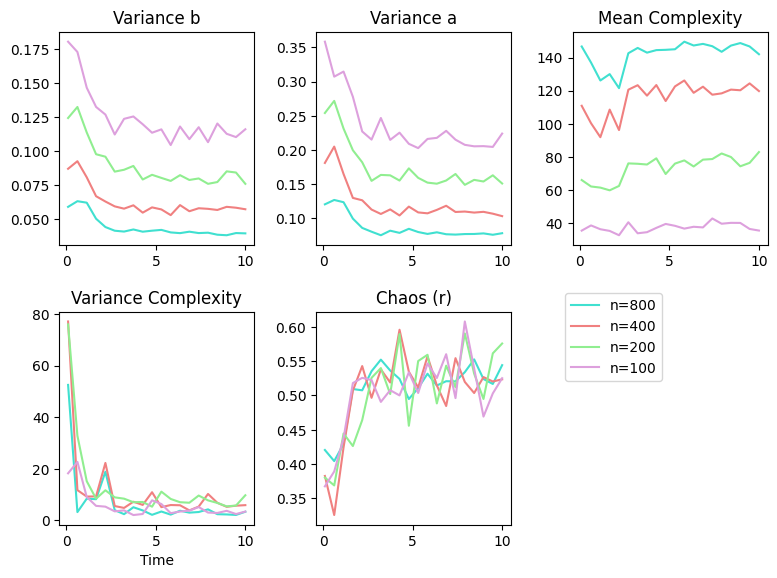

In [3]:
fig, ax = plt.subplots(2,3, figsize=(8,6))

ax[0][0].plot(k, np.mean(variance_b800, axis=0), color='turquoise')
ax[0][0].plot(k, np.mean(variance_b400, axis=0), color='lightcoral')
ax[0][0].plot(k, np.mean(variance_b200, axis=0), color='lightgreen')
ax[0][0].plot(k, np.mean(variance_b100, axis=0), color='plum')

ax[0][0].set_title('Variance b')


ax[0][1].plot(k, np.mean(variance_a800, axis=0), color='turquoise')
ax[0][1].plot(k, np.mean(variance_a400, axis=0), color='lightcoral')
ax[0][1].plot(k, np.mean(variance_a200, axis=0), color='lightgreen')
ax[0][1].plot(k, np.mean(variance_a100, axis=0), color='plum')

ax[0][1].set_title('Variance a')


ax[0][2].plot(k, np.mean(mean_comp800, axis=0), color='turquoise')
ax[0][2].plot(k, np.mean(mean_comp400, axis=0), color='lightcoral')
ax[0][2].plot(k, np.mean(mean_comp200, axis=0), color='lightgreen')
ax[0][2].plot(k, np.mean(mean_comp100, axis=0), color='plum')

ax[0][2].set_title('Mean Complexity')


ax[1][0].plot(k, np.var(mean_comp800, axis=0), color='turquoise')
ax[1][0].plot(k, np.var(mean_comp400, axis=0), color='lightcoral')
ax[1][0].plot(k, np.var(mean_comp200, axis=0), color='lightgreen')
ax[1][0].plot(k, np.var(mean_comp100, axis=0), color='plum')

ax[1][0].set_title('Variance Complexity')
ax[1][0].set_xlabel('Time')

ax[1][1].plot(k, np.mean(mean_chaos800, axis=0), color='turquoise', label='n=800')
ax[1][1].plot(k, np.mean(mean_chaos400, axis=0), color='lightcoral', label='n=400')
ax[1][1].plot(k, np.mean(mean_chaos200, axis=0), color='lightgreen', label='n=200')
ax[1][1].plot(k, np.mean(mean_chaos100, axis=0), color='plum', label='n=100')

ax[1][1].set_title('Chaos (r)')
handles, labels = ax[1][1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', bbox_to_anchor=(0.85,0.335))

ax[1][2].remove()
fig.tight_layout(pad=1.5)


## Plots for the paper

Here you can see the figures used for the paper

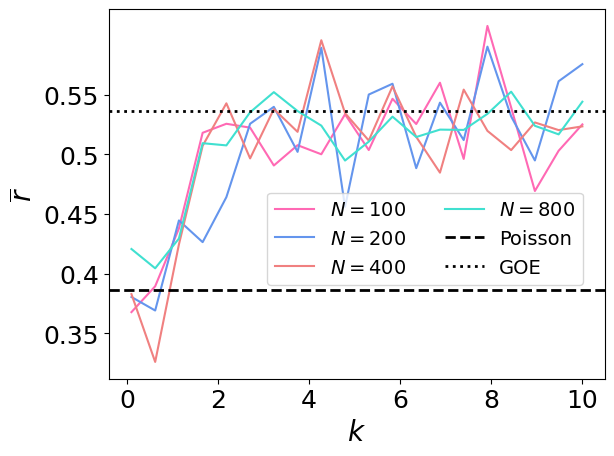

In [4]:
plt.plot(k, mean_chaos100[0], color='hotpink', label=r'$N=100$')
plt.plot(k, mean_chaos200[0], color='cornflowerblue', label=r'$N=200$')
plt.plot(k, mean_chaos400[0], color='lightcoral', label=r'$N=400$')
plt.plot(k, mean_chaos800[0], color='turquoise', label=r'$N=800$')
plt.axhline(y=0.38629, linestyle='dashed', linewidth = 2, color='black', label='Poisson')
plt.axhline(y=0.5359, linestyle='dotted',  linewidth = 2, color='black', label='GOE')
plt.xlabel(r'$k$', fontsize=20)
plt.ylabel(r'$\overline{r}$', fontsize=20)
plt.xticks([0,2,4,6,8,10], [0,2,4,6,8,10], fontsize=18)
plt.yticks([0.35,0.4,0.45, 0.5, 0.55], [0.35,0.4,0.45, 0.5, 0.55], fontsize=18)
#plt.axhline(y=0.38629, linestyle='dashed', color='black', label='Poisson')
#plt.axhline(y=0.53590, linestyle='dotted', color='black', label='GOE')
plt.legend(bbox_to_anchor=(0.3, 0.53),
           fontsize=14, ncols=2)

Text(0.2, 74, '(b)')

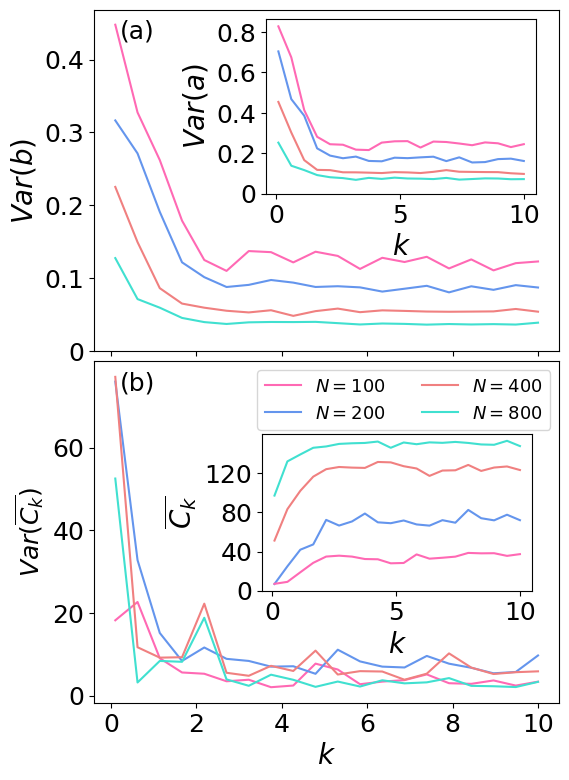

In [5]:
fig, (ax1, ax3)= plt.subplots(2,1, figsize=(6,9), height_ratios=[1,1])
plt.subplots_adjust(hspace=0.03)

ax1.plot(k, variance_b800[0], color='turquoise')
ax1.plot(k, variance_b400[0], color='lightcoral')
ax1.plot(k, variance_b200[0], color='cornflowerblue')
ax1.plot(k, variance_b100[0], color='hotpink')

ax1.tick_params(labelbottom=False) 
ax1.set_yticks([0,0.1,0.2,0.3, 0.4], [0,0.1,0.2,0.3, 0.4], fontsize=18)
ax1.set_ylabel(r'$Var(b)$', fontsize=20)

ax2 = inset_axes(ax1, width="45%", height="50%",loc=2, bbox_to_anchor = (240,440,600,350))
ax2.plot(k, variance_a800[0], color='turquoise')
ax2.plot(k, variance_a400[0], color='lightcoral')
ax2.plot(k,variance_a200[0], color='cornflowerblue')
ax2.plot(k, variance_a100[0], color='hotpink')
ax2.set_yticks([0,0.2,0.4,0.6, 0.8], [0,0.2,0.4,0.6, 0.8], fontsize=18)
ax2.set_ylabel(r'$Var(a)$', fontsize=20)
ax2.set_xticks([0,5,10 ], [0,5,10 ], fontsize=18)
ax2.set_xlabel(r'$k$', fontsize=20)


ax3.plot(k, np.var(mean_comp100, axis=0) , color='hotpink', label=r'$N=100$')
ax3.plot(k, np.var(mean_comp200, axis=0) , color='cornflowerblue',label=r'$N=200$')
ax3.plot(k, np.var(mean_comp400, axis=0), color='lightcoral',label=r'$N=400$')
ax3.plot(k, np.var(mean_comp800, axis=0) , color='turquoise',label=r'$N=800$')

ax3.set_ylabel(r'$Var({\overline{C_k}})$', fontsize=18)
ax3.set_yticks([0,20, 40, 60 ], [ 0,20, 40, 60], fontsize=18)
ax3.set_xticks([0,2,4,6,8,10], [0,2,4,6,8,10], fontsize=18)
ax3.legend(fontsize=13, ncols=2)
ax3.set_xlabel(r'$k$', fontsize=20)
#ax3.set_yscale('log')

ax4 = inset_axes(ax3, width="45%", height="45%", loc=1,  bbox_to_anchor = (-80,25,600,350))
ax4.plot(k, mean_comp800[0], color='turquoise')
ax4.plot(k,  mean_comp400[0], color='lightcoral')
ax4.plot(k, mean_comp200[0], color='cornflowerblue')
ax4.plot(k, mean_comp100[0], color='hotpink')

ax4.set_yticks([0,40,80,120], [0,40,80,120], fontsize=18)
ax4.set_ylabel(r'$\overline{C_k}$', fontsize=20)
ax4.set_xticks([0,5,10 ], [0,5,10 ], fontsize=18)
ax4.set_xlabel(r'$k$', fontsize=20)

ax1.text(0.2,0.43, '(a)', fontsize=18)
ax3.text(0.2, 74, '(b)', fontsize=18)

## Krylov approach with reduced Lanczos coefficients
In this section, we study the performance of the Krylov approach when considering only a simplified subset of coefficients from the complete Lanczos sequence. Rather than calculating the Krylov complexity and statistics using all coefficients $a$ and $b$, we perform the calculations here using only a fraction of these coefficients while disregarding the tail end of the sequence.

In [ ]:
n=400
nk=20
tmax=100.
num_initial_states = 1
k=np.linspace(0.1,10.,nk)

# Initial state
k0=0.01
G=maUS(k0, n)
eig,evec=linalg.eig(G)


# Lists with results
variance_a= []
variance_b = []
mean_comp = []
mean_chaos = []
size_k = [1, 1/2, 1/4, 1/8, 1/16]

for j in range(num_initial_states):
    ff=evec[j] # Initial state
    va = []
    vb = []
    mc = []
    cha = []

    for i in tqdm(range(len(k))):
        # Create Hamiltonian
        k0=k[i]
        F=-1j*linalg.logm(maUS(k0, n))

        # Define lists to store statistics
        varia_a=[]
        varia_b=[]
        mea_comp=[]
        chaos = []

        for coef in size_k:          
            # Calculate r
            ei=np.sort(np.real(linalg.eigvals(F)))
            chaos.append(r_chaometer(ei,False))

            # Calculate Krilov basis           
            a,b,c=FO_state(F,ff)
            a = a[:int(len(a)*coef)] # We cut the Lanczos coefficiente
            b = b[:int(len(b)*coef)] # We cut the Lanczos coefficiente
            # Calculate Krilov compleity
            x,y=k_complexity(a,b, tmax, ntimes=500)
            mea_comp.append(np.mean(np.real(y[-250:]))) # Mean complexity

            # Calculate variance b with respect to the mean
            x1=np.linspace(0.,len(b),len(b))
            df = pd.DataFrame({'B': b})
            yy=df.rolling(window=10).std()
            yycut=yy[10:]
            xxcut=x1[10:]
            varia_b.append(yycut.mean().iloc[0]) # Variance b
            
            # Calculate variance a with respect to the mean
            x1=np.linspace(0.,len(a),len(a))
            df = pd.DataFrame({'A': np.real(a)})
            yy=df.rolling(window=10).std()
            yycut=yy[10:]
            xxcut=x1[10:]
            varia_a.append(yycut.mean().iloc[0]) # Variance a
            
        va.append(varia_a)
        vb.append(varia_b)
        mc.append(mea_comp)
        cha.append(chaos)

    variance_a.append(va)
    variance_b.append(vb)
    mean_comp.append(mc)
    mean_chaos.append(cha)

variance_a = np.array(variance_a)
variance_b = np.array(variance_b)
mean_comp = np.array(mean_comp)
mean_chaos = np.array(mean_chaos)

In [14]:
with open('results/SMAP_mean_comp_400_short_coefs.npy', 'wb') as f:
    np.save(f, mean_comp)

with open('results/SMAP_var_a_400_short_coefs.npy', 'wb') as f:
    np.save(f, variance_a)

with open('results/SMAP_var_b_400_short_coefs.npy', 'wb') as f:
    np.save(f, variance_b)

with open('results/SMAP_mean_chaos_400_short_coefs.npy', 'wb') as f:
    np.save(f, mean_chaos)


## Load all results

We load the results for multiple Hilbert space sizes and we plot the statistics. These are the plots that we can see in the paper.

In [6]:
with open('results/SMAP_mean_comp_400_short_coefs.npy', 'rb') as f:
    mean_comp = np.load(f)

with open('results/SMAP_var_a_400_short_coefs.npy', 'rb') as f:
    variance_a = np.load(f)

with open('results/SMAP_var_b_400_short_coefs.npy', 'rb') as f:
    variance_b = np.load(f)

with open('results/SMAP_mean_chaos_400_short_coefs.npy', 'rb') as f:
    mean_chaos = np.load(f)

n=400
nk=20
tmax=100.
num_initial_states = 1
k=np.linspace(0.1,10.,nk)

Text(0.1, 125, '(b)')

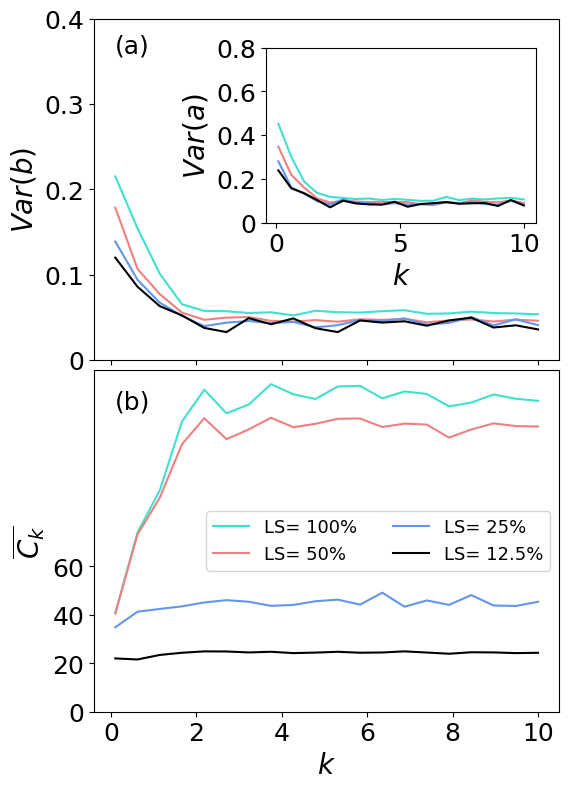

In [7]:
fig, (ax1, ax3)= plt.subplots(2,1, figsize=(6,9))
plt.subplots_adjust(hspace=0.03)

ax1.plot(k, np.mean(variance_b[:,:,0], axis=0), color='turquoise',label='Heisenberg time')
ax1.plot(k, np.mean(variance_b[:,:,1], axis=0), color='lightcoral',label='Scrambling time')
ax1.plot(k, np.mean(variance_b[:,:,2], axis=0), color='cornflowerblue',label='tScr/25')
ax1.plot(k, np.mean(variance_b[:,:,3], axis=0), color='black', label='True (Hamiltonian)')

ax1.tick_params(labelbottom=False) 
ax1.set_yticks([0,0.1,0.2,0.3, 0.4], [0,0.1,0.2,0.3, 0.4], fontsize=18)
ax1.set_ylabel(r'$Var(b)$', fontsize=20)

ax2 = inset_axes(ax1, width="45%", height="50%",loc=2, bbox_to_anchor = (240,420,600,350))
ax2.plot(k, np.mean(variance_a[:,:,0], axis=0), color='turquoise')
ax2.plot(k, np.mean(variance_a[:,:,1], axis=0), color='lightcoral')
ax2.plot(k, np.mean(variance_a[:,:,2], axis=0), color='cornflowerblue')
ax2.plot(k, np.mean(variance_a[:,:,3], axis=0), color='black')

ax2.set_yticks([0,0.2,0.4,0.6, 0.8], [0,0.2,0.4,0.6, 0.8], fontsize=18)
ax2.set_ylabel(r'$Var(a)$', fontsize=20)
ax2.set_xticks([0,5,10 ], [0,5,10 ], fontsize=18)
ax2.set_xlabel(r'$k$', fontsize=20)


ax3.plot(k, np.mean(mean_comp[:,:,0], axis=0), color='turquoise',label=r'LS= 100%')
ax3.plot(k, np.mean(mean_comp[:,:,1], axis=0), color='lightcoral',label=r'LS= 50%')
ax3.plot(k, np.mean(mean_comp[:,:,2], axis=0), color='cornflowerblue',label=r'LS= 25%')
ax3.plot(k, np.mean(mean_comp[:,:,3], axis=0), color='black',label=r'LS= 12.5%')

ax3.set_ylabel(r'$\overline{C_k}$', fontsize=20)
ax3.set_yticks([0,20, 40, 60 ], [ 0,20, 40, 60], fontsize=18)
ax3.set_xticks([0,2,4,6,8,10], [0,2,4,6,8,10], fontsize=18)
ax3.legend(fontsize=13, ncols=2)
ax3.set_xlabel(r'$k$', fontsize=20)

ax1.text(0.1,0.36, '(a)', fontsize=18)
ax3.text(0.1, 125, '(b)', fontsize=18)